In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = {
    'Weather': ['Sunny', 'Cloudy', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Cloudy', 'Rainy'],
    'Temperature' : ['Hot', 'Hot', 'Mild', 'Mild', 'Mild', 'Cool', 'Mild', 'Hot', 'Hot', 'Mild'],
    'Humidity' : ['High', 'High', 'Normal', 'High', 'High', 'Normal', 'High', 'High', 'Normal', 'High'],
    'Wind' : ['Weak', 'Weak', 'Strong', 'Strong', 'Strong', 'Strong', 'Weak', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
}

# Create dataframe
df = pd.DataFrame(data)
print(df)
print(df.dtypes)



  Weather Temperature Humidity    Wind Play
0   Sunny         Hot     High    Weak   No
1  Cloudy         Hot     High    Weak  Yes
2   Sunny        Mild   Normal  Strong  Yes
3  Cloudy        Mild     High  Strong  Yes
4   Rainy        Mild     High  Strong   No
5   Rainy        Cool   Normal  Strong   No
6   Rainy        Mild     High    Weak  Yes
7   Sunny         Hot     High  Strong   No
8  Cloudy         Hot   Normal    Weak  Yes
9   Rainy        Mild     High  Strong   No
Weather        object
Temperature    object
Humidity       object
Wind           object
Play           object
dtype: object


In [54]:
# Import necessary library files

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.tree import plot_tree


X = df[['Humidity' , 'Temperature' , 'Weather' , 'Wind']]
y = df['Play']


In [55]:
print(X.dtypes)
print(y.dtypes)

Humidity       object
Temperature    object
Weather        object
Wind           object
dtype: object
object


In [56]:
# Encode categorical features
# Convert object into category
cols = ['Humidity', 'Temperature', 'Weather', 'Wind']
X = X.astype({col: 'category' for col in cols})

# One hot encoding
X = pd.get_dummies(X[['Humidity', 'Temperature', 'Weather', 'Wind']])


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 17)


In [57]:
print(X)
print(y)

   Humidity_High  Humidity_Normal  Temperature_Cool  Temperature_Hot  \
0           True            False             False             True   
1           True            False             False             True   
2          False             True             False            False   
3           True            False             False            False   
4           True            False             False            False   
5          False             True              True            False   
6           True            False             False            False   
7           True            False             False             True   
8          False             True             False             True   
9           True            False             False            False   

   Temperature_Mild  Weather_Cloudy  Weather_Rainy  Weather_Sunny  \
0             False           False          False           True   
1             False            True          False          False   


In [58]:
# Develop the model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# Train the model
clf.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,17
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Accuracy:  0.6666666666666666


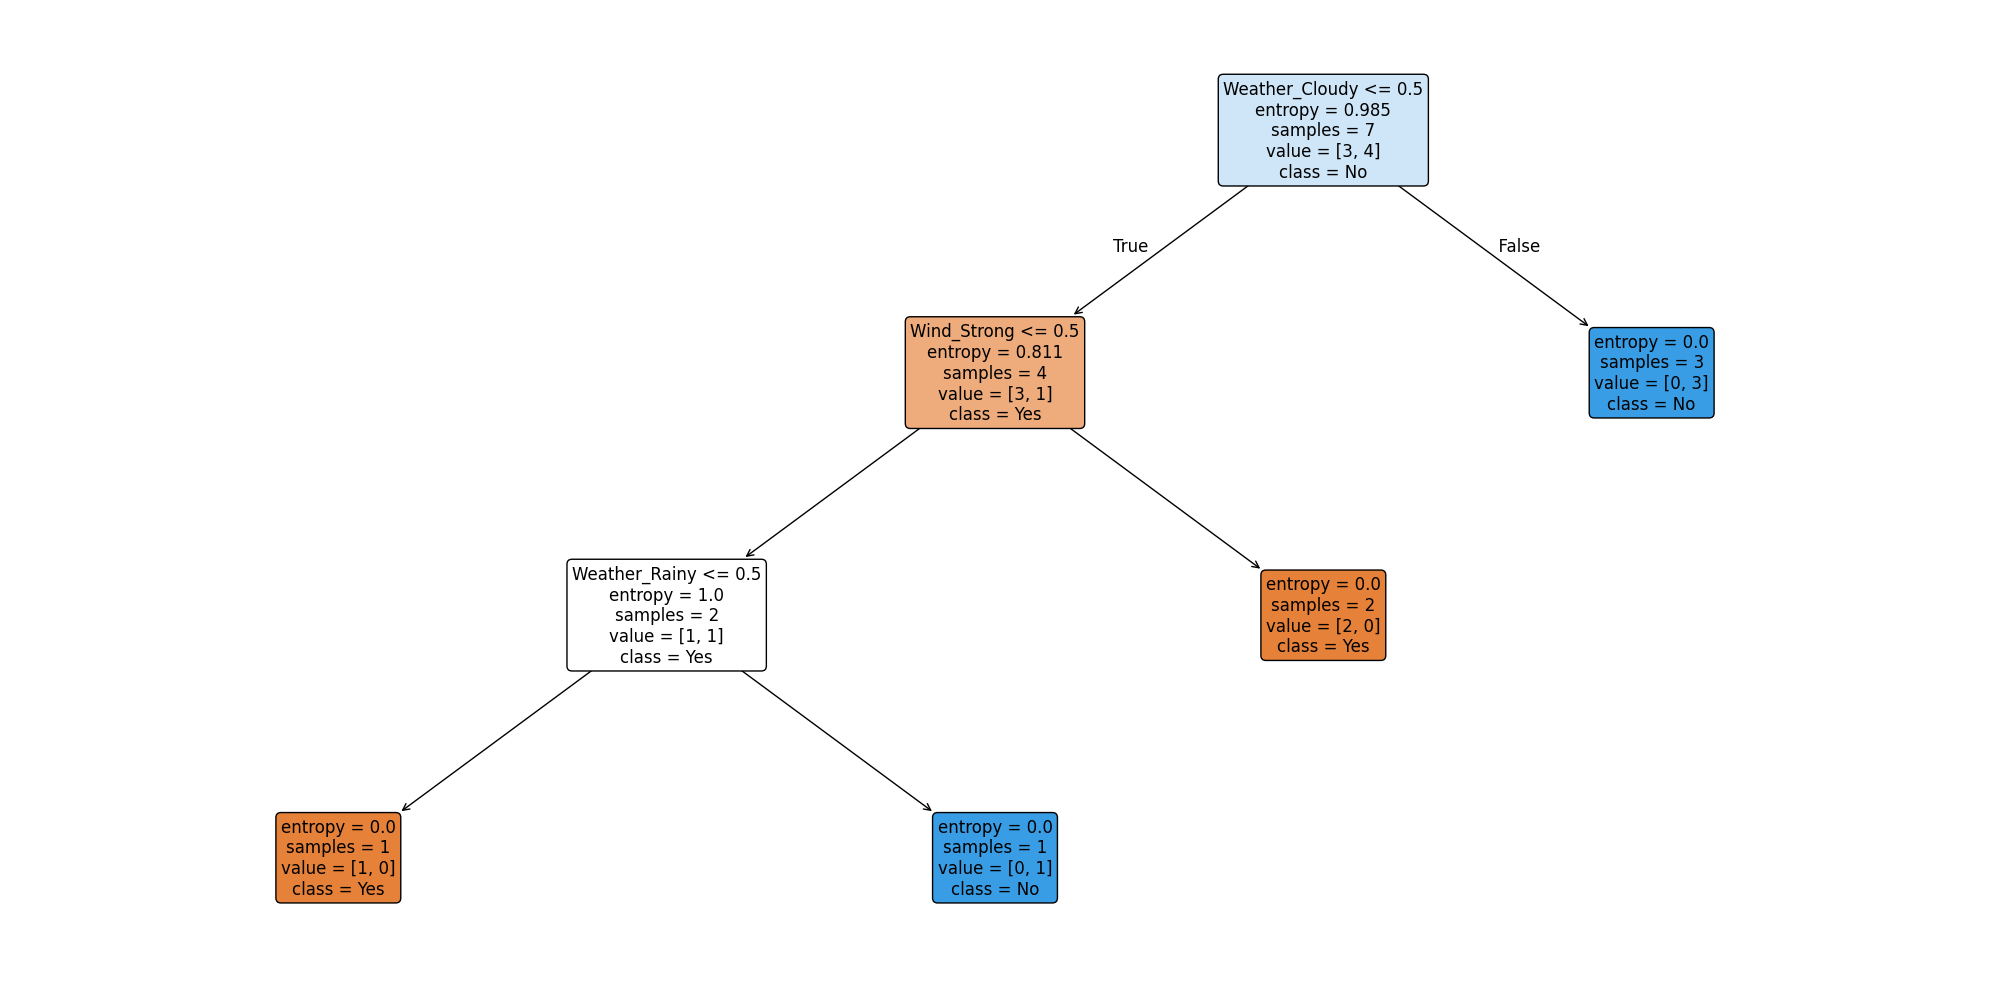

In [59]:
# Predict
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

plt.figure(figsize=(20, 10))  # Larger size
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Yes', 'No'],
    filled=True,
    rounded=True,
    fontsize=12,  # Larger font
)
plt.tight_layout()
plt.show()

